In [216]:
import numpy.random as rand
import matplotlib.pyplot as plt
import math

In [217]:
def algorithm(points_sample, answer):
    """ Returns (a1, b1, a2, b2) for given points sample. Returns (1, 0, 1, 0) in case none of the points is positive. """
    a1 = 1
    a2 = 1
    b1 = 0
    b2 = 0
    for (x1, x2), y in zip(points_sample, answer):
        if y == 1:
            if x1 < a1:
                a1 = x1
            if x1 > b1:
                b1 = x1
            if x2 < a2:
                a2 = x2
            if x2 > b2:
                b2 = x2
    return (a1, b1, a2, b2)

In [218]:
def true_risk(q, x, a1, b1, a2, b2):
    if (a1, b1, a2, b2) == (1, 0, 1, 0):
        return 1 - (q / x)**0.5
    empirical_positive_size = (b1 - a1) * (b2 - a2)
    true_positive_size = q * q
    mistaken_size = true_positive_size - empirical_positive_size
    return mistaken_size / (x * x)

In [219]:
def true_risk_plot(q, x, m_max, step):
    m_values = [m for m in xrange(10, m_max, step)]
    true_risks = []
    iterations = 100
    
    for m in m_values:
        true_risk_for_m = 0
        for _ in xrange(0, iterations):
            points = zip(rand.sample(m), rand.sample(m))
            f = [1 if point[0] < q and point[1] < q else 0 for point in points]
            h_params = algorithm(points, f)
            true_risk_for_m += true_risk(q, x, *h_params)
        true_risk_for_m /= iterations
        true_risks.append(true_risk_for_m)
        
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(m_values, true_risks)
    plt.xlabel('Training set size')
    plt.ylabel('True risk')
    
    plt.subplot(1, 2, 2)
    plt.plot(m_values, [math.log(risk) for risk in true_risks])
    plt.xlabel('Training set size')
    plt.ylabel('True risk (ln)')
    
    plt.tight_layout()
    plt.show()

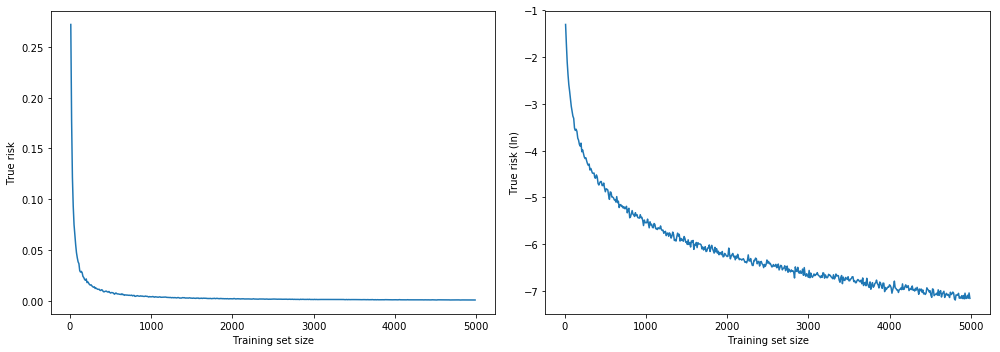

In [220]:
# m = 1000#input("Enter m: ")

# points = zip(rand.sample(m), rand.sample(m))

# q = 0.5**0.5
# f = [1 if point[0] < q and point[1] < q else 0 for point in points]
# h_params = algorithm(points, f)

# #print points
# #print f
# print h_params

# print true_risk(q, 1.0, *h_params)
true_risk_plot(0.5**0.5, 1.0, 5000, 10)